In [5]:
import pandas as pd

df = pd.read_csv('data/qsar_aquatic_toxicity.csv', sep=';')
df.head()

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064


In [ ]:
print("Shape:", df.shape)

# Tipos de datos
print("Tipos de datos:\n", df.dtypes)

# Verificar valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())


Shape: (545, 9)
Tipos de datos:
 0        float64
0.1      float64
0.2        int64
2.419    float64
1.225    float64
0.667    float64
0.3        int64
0.4        int64
3.740    float64
dtype: object
Valores nulos por columna:
 0        0
0.1      0
0.2      0
2.419    0
1.225    0
0.667    0
0.3      0
0.4      0
3.740    0
dtype: int64


In [10]:
print("Estadísticas descriptivas:\n", df.describe())

Estadísticas descriptivas:
                 0         0.1         0.2       2.419       1.225      0.667  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.00000   
mean    48.561872   58.977035    0.939450    2.313299    2.494624    1.04696   
std     46.760699   68.182392    1.619619    1.743392    0.809925    0.40372   
min      0.000000    0.000000    0.000000   -6.446000    1.000000    0.28100   
25%     15.790000   11.000000    0.000000    1.228000    1.975000    0.73700   
50%     40.460000   42.683000    0.000000    2.273000    2.344000    1.02100   
75%     70.140000   77.727000    1.000000    3.395000    2.913000    1.26700   
max    347.320000  571.952000   18.000000    9.148000    6.439000    2.50000   

              0.3         0.4       3.740  
count  545.000000  545.000000  545.000000  
mean     1.005505    0.354128    4.660106  
std      1.397860    0.807426    1.666279  
min      0.000000    0.000000    0.122000  
25%      0.000000    0.000000  

In [ ]:
# Crear el modelo KNN (regresión)
knn = KNeighborsRegressor(n_neighbors=5)

# Entrenar
knn.fit(X_train, y_train)

# Predecir
y_pred = knn.predict(X_test)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 1.8729841666055047


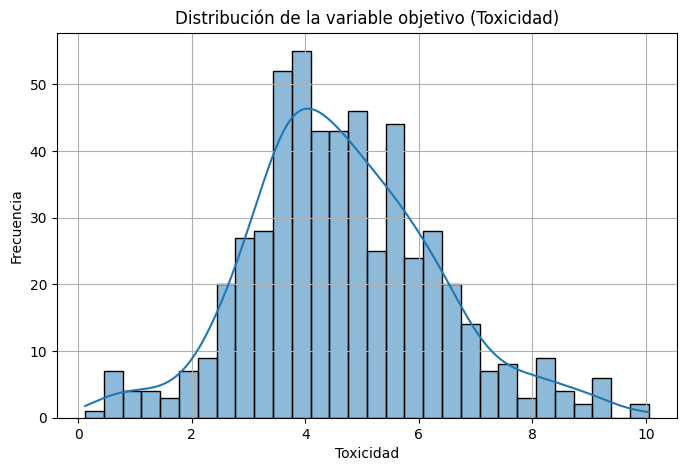

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que la última columna es la variable objetivo
target = df.columns[-1]

# Histograma de la variable objetivo
plt.figure(figsize=(8, 5))
sns.histplot(df[target], kde=True, bins=30)
plt.title("Distribución de la variable objetivo (Toxicidad)")
plt.xlabel("Toxicidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar variables independientes (X) y dependiente (y)
X = df.iloc[:, :-1]  # todas menos la última
y = df.iloc[:, -1]   # última columna

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

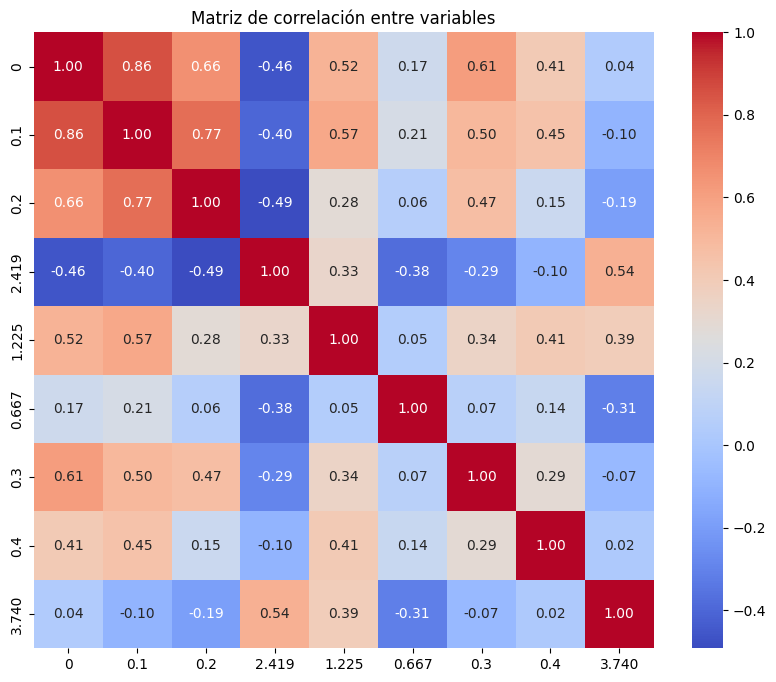

In [12]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()


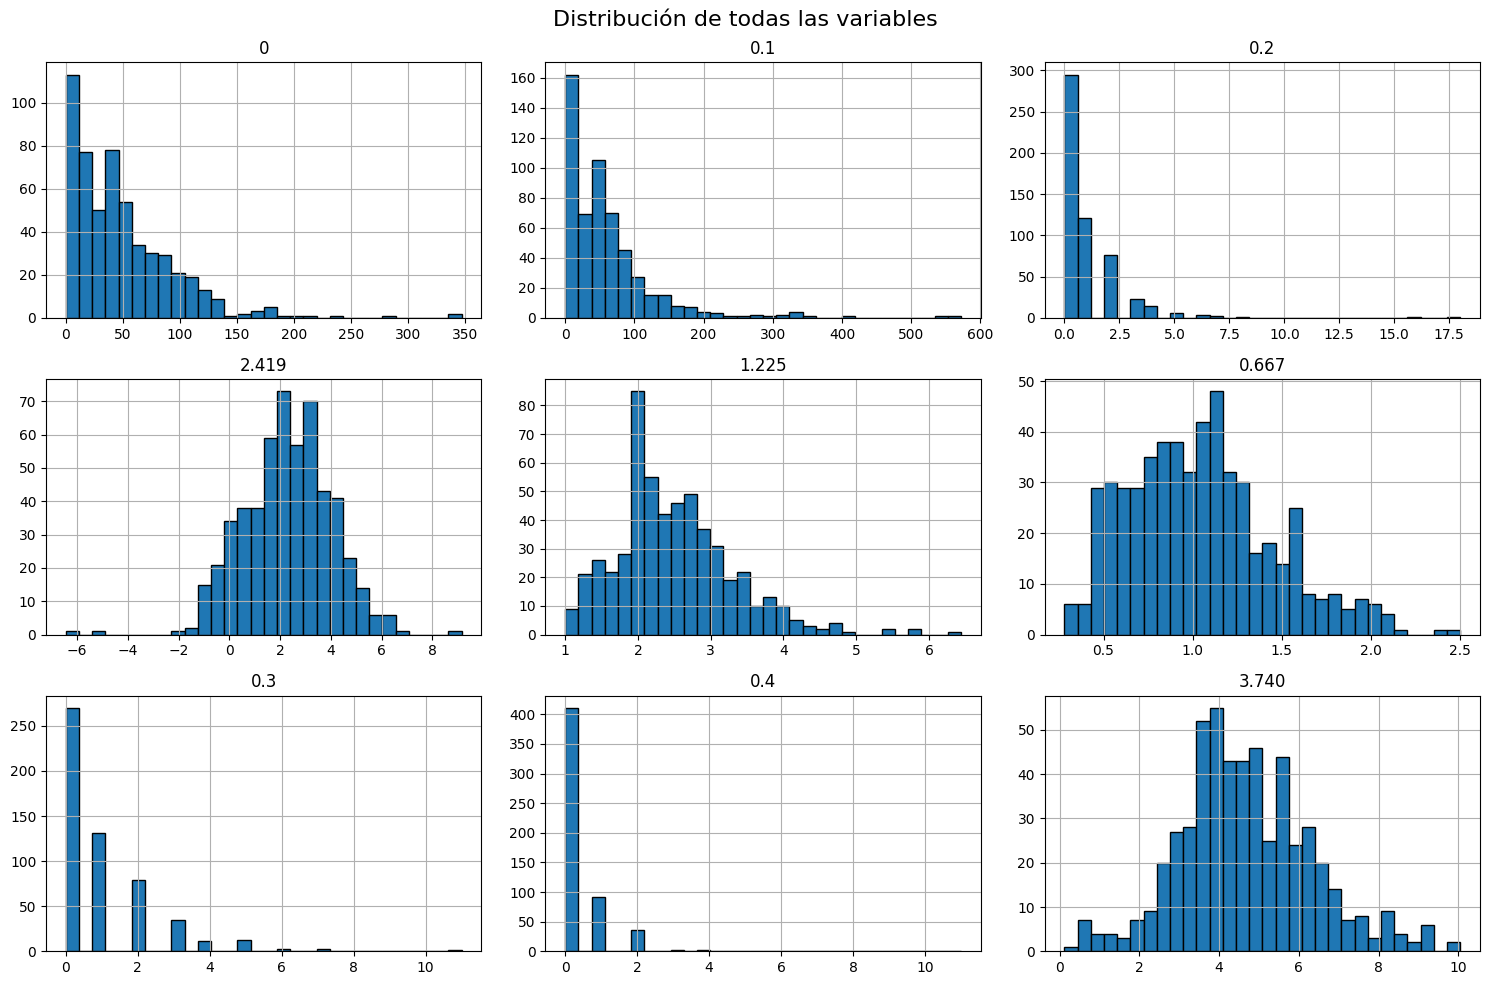

In [13]:
# Histogramas de todas las columnas
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribución de todas las variables", fontsize=16)
plt.tight_layout()
plt.show()


MSE: 1.4649
R²: 0.4025
MSE: 1.4649
R²: 0.4025


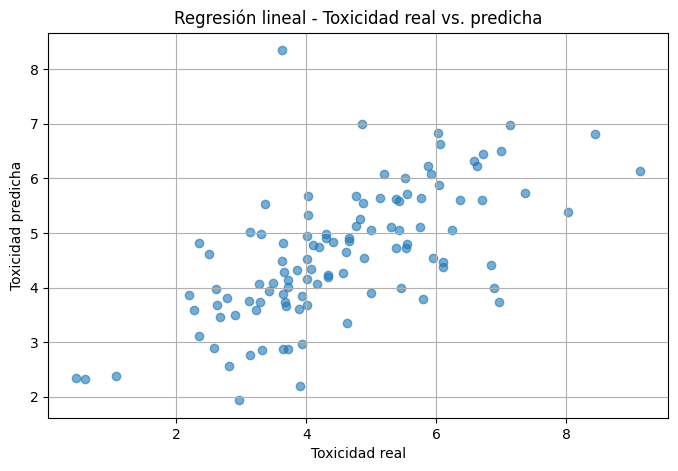

In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score  # ← asegúrate de incluir r2_score

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", round(mse, 4))
print("R²:", round(r2, 4))

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", round(mse, 4))
print("R²:", round(r2, 4))

# Visualizar
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Toxicidad real")
plt.ylabel("Toxicidad predicha")
plt.title("Regresión lineal - Toxicidad real vs. predicha")
plt.grid(True)
plt.show()


Error cuadrático medio: 1.2976357158536584
